In [1]:
import pandas as pd
import numpy as np
import camelot
import ghostscript
import sys

 # adding folders up to system path to access functions
sys.path.insert(0, '../../../')
from driveFolderHandler import downloadTempDriveFolder, deleteTempDriveFolder

In [4]:
path = "../temp-docs"
downloadTempDriveFolder(folderID='1ht2pHxJQeD4Ww5eBUfhv9tUko4O0jyMI',
                        path = path)

Retrieving folder list


Processing file 1SQi52iq1npTHqBQJEJ43VQstu7Fe-W85 2022-DWSRF-Lead-Service-Line-Replacement-IUP-1.pdf
Processing file 1Cl_TkRx_d4xcPzJNzsXAJaG7urodomj5 2022-DWSRF-Supplemental-IUP-3.pdf
Processing file 1KI70sZljSN7tv4GAPCquHSsnawafHMPA FY2022-DWSRF-EC-IUP_draft-2.pdf
Processing file 1bV9ezYt9wmzUSLyB6r3KO7cQBq7OCCtM GA_PPL_2023.pdf
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1SQi52iq1npTHqBQJEJ43VQstu7Fe-W85
To: /Users/pcork/epic/dw-dashboard/year1/GA/temp-docs/2022-DWSRF-Lead-Service-Line-Replacement-IUP-1.pdf
100%|██████████| 6.65M/6.65M [00:00<00:00, 15.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Cl_TkRx_d4xcPzJNzsXAJaG7urodomj5
To: /Users/pcork/epic/dw-dashboard/year1/GA/temp-docs/2022-DWSRF-Supplemental-IUP-3.pdf
100%|██████████| 823k/823k [00:00<00:00, 7.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KI70sZljSN7tv4GAPCquHSsnawafHMPA
To: /Users/pcork/epic/dw-dashboard/year1/GA/temp-docs/FY2022-DWSRF-EC-IUP_draft-2.pdf
100%|██████████| 456k/456k [00:00<00:00, 4.95MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bV9ezYt9wmzUSLyB6r3KO7cQBq7OCCtM
To: /Users/pcork/epic/dw-dashboard/year1/GA/temp-docs/GA_PPL_2023.pdf
100%|██████████| 187k/187k [00:00<00:00, 2.79MB/s]

Files stored in ../temp-docs



Download completed


# Georgia

## Supplemental IUP

### Attachment 1

In [7]:
ga_supp = camelot.read_pdf(path+"/2022-DWSRF-Supplemental-IUP-3.pdf", 
                           pages='10-14', flavor='lattice')
print(len(ga_supp))

Parsing Georgia Supplemental, 10/50...
5


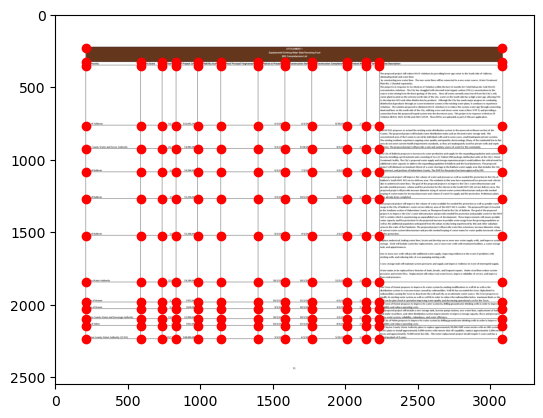

In [10]:
#preview lattice technique's interpretation of the table
camelot.plot(ga_supp[1], kind='joint').show()

In [ ]:
ga_supp[0].df

In [12]:
# for each page, drop row 0 because it is the main title
# drop row 1 because it is the column headings
# assign column headings
# replace break characters with single space
# bind together into a single df

#list for storing each page
list_of_dfs = []

#loop through each page
for i in range(len(ga_supp)):
    
    page_df = ga_supp[i].df

    # remove title row
    page_df = page_df.iloc[1:,].copy().reset_index(drop=True)

    #throughout the dataframe, remove the linebreak and add a space
    page_df = page_df.replace('\n',' ', regex=True)
    page_df = page_df.replace(r'\s+',' ', regex=True)

    # set column names based on first row
    page_df.columns = page_df.iloc[0,]
    # remove first row
    page_df = page_df.iloc[1:,].copy()

    list_of_dfs.append(page_df)

#combine all of the dataframes listed to a single and drop index
ga_supp_output = pd.concat(list_of_dfs).reset_index(drop=True)

In [15]:
# fix overlapping text instace
ga_supp_output['Population'] = ga_supp_output['Population'].str.replace("10 N/A", "N/A")

ga_supp_output.loc[ga_supp_output['Community'] == "North GA Mountains Authority", 'Project Score'] = 10

In [ ]:
ga_supp_output

In [17]:
#export to csv
ga_supp_output.to_csv("../data/srf-ppl/10-Georgia_Supplemental_IUP_A1.csv", index=False)

### Attachment 2

In [23]:
ga_supp = camelot.read_pdf(path+"/2022-DWSRF-Supplemental-IUP-3.pdf", 
                           pages='15', flavor='stream')
print(len(ga_supp))

1


In [46]:
ga_supp_2 = ga_supp[0].df
ga_supp_2

,Project,,Loan Amount,Notice to Proceed Date,Constr. Start Date,Target Compl. Date,3rd Qtr 1/23-3/23,4th Qtr 4/23-6/23,1st Qtr 7/23-9/23,2nd Qtr 10/12-12/23,3rd Qtr 1/24-3/23,4th Qtr 4/24-6/24,1st Qtr 7/24-9/24,2nd Qtr 10/24-12/24,Total Disburs.
0,,,,,,,,Attachment 2,,,,,,,
1,,,,,,,,Drinking Water State Revolving Fund,,,,,,,
2,,,,,,,,Estimated Disbursement Schedule,,,,,,,
3,,,,NOTICE TO,CONSTR.,TARGET,3rd,4th,1st,2nd,3rd,4th,1st,2nd,
4,,,LOAN,PROCEED,START,COMPL.,Qtr,Qtr,Qtr,Qtr,Qtr,Qtr,Qtr,Qtr,TOTAL
5,PROJECT,,AMOUNT,DATE,DATE,DATE,1/23-3/23,4/23-6/23,7/23-9/23,10/23-12/23,1/24-3/24,4/24-6/24,7/24-9/24,10/24-12/24,DISBURS.
6,City of Americus,,"$12,000,000",1/1/2023,3/1/2023,2/1/2024,"$750,000","$3,000,000","$3,000,000","$2,220,000","$3,000,000","$10,000","$10,000","$10,000","$ \n12,000,000"
7,Clayton County Water Authority,,"$40,000,000",5/1/2023,6/1/2023,6/1/2026,,"$1,000,000","$3,000,000","$2,000,000","$3,000,000","$4,000,000","$4,000,000","$3,000,000","$ \n20,000,000"
8,,TOTAL,"$ \n52,000,000",,,,"$ \n750,000","$ \n4,000,000","$ \n6,000,000","$ \n4,220,000","$ \n6,000,000","$ \n4,010,000","$ \n4,010,000","$ \n3,010,000","$ \n32,000,000"
9,,,,,,,,15,,,,,,,


In [47]:
# manually assign all columns since they are split across multiple rows, including one that is empty
ga_supp_2_cols = ["Project", "", "Loan Amount", "Notice to Proceed Date", "Constr. Start Date", "Target Compl. Date", "3rd Qtr 1/23-3/23", 
                  "4th Qtr 4/23-6/23", "1st Qtr 7/23-9/23", "2nd Qtr 10/12-12/23", "3rd Qtr 1/24-3/23", "4th Qtr 4/24-6/24",
                  "1st Qtr 7/24-9/24", "2nd Qtr 10/24-12/24", "Total Disburs."]
ga_supp_2.columns = ga_supp_2_cols

# drop first five rows and drop last row that aren't project data
ga_supp_2 = ga_supp_2.iloc[6:-2,].copy().reset_index(drop=True)

# replace line breaks
ga_supp_2['Total Disburs.'] = ga_supp_2['Total Disburs.'].str.replace("\n", "")

# drop empty column
ga_supp_2.drop(columns=[""], inplace=True)

ga_supp_2

,Project,Loan Amount,Notice to Proceed Date,Constr. Start Date,Target Compl. Date,3rd Qtr 1/23-3/23,4th Qtr 4/23-6/23,1st Qtr 7/23-9/23,2nd Qtr 10/12-12/23,3rd Qtr 1/24-3/23,4th Qtr 4/24-6/24,1st Qtr 7/24-9/24,2nd Qtr 10/24-12/24,Total Disburs.
0,City of Americus,"$12,000,000",1/1/2023,3/1/2023,2/1/2024,"$750,000","$3,000,000","$3,000,000","$2,220,000","$3,000,000","$10,000","$10,000","$10,000","$ 12,000,000"
1,Clayton County Water Authority,"$40,000,000",5/1/2023,6/1/2023,6/1/2026,,"$1,000,000","$3,000,000","$2,000,000","$3,000,000","$4,000,000","$4,000,000","$3,000,000","$ 20,000,000"


In [48]:
ga_supp_2.to_csv("../data/srf-ppl/10-Georgia_Supplemental_IUP_A2.csv", index=False)

## Lead IUP

### Attachment 1

In [49]:
ga_lead_1 = camelot.read_pdf(path+"/2022-DWSRF-Lead-Service-Line-Replacement-IUP-1.pdf", 
                           pages='10-36', flavor='lattice', )
print(len(ga_lead_1))

Parsing Georgia Lead IUP...
27


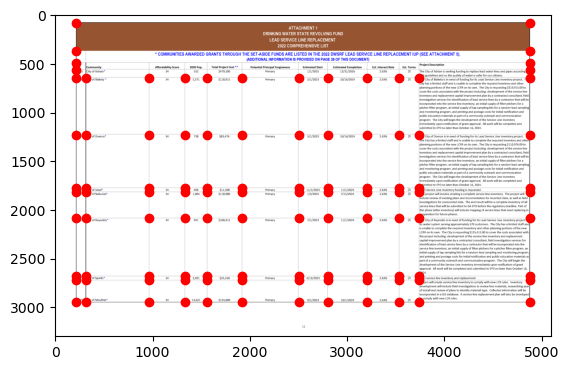

In [55]:
#preview lattice technique's interpretation of the table
camelot.plot(ga_lead_1[1], kind='joint').show()

In [67]:
ga_lead_1[26].df

,0,1,2,3,4,5,6,7,8,9,10
0,ATTACHMENT 1\nDRINKING WATER STATE REVOLVING F...,,,,,,,,,,
1,* COMMUNITIES AWARDED GRANTS THROUGH THE SET-A...,,,,,,,,,,
2,Project Description\nTotal Project Cost **\nCo...,,,,,,,,,,
3,250,Jekyll Island State Park Authority,12,"2,000","$100,000",Alternate,6/1/2023,10/1/2024,2.63%,20,The Jekyll Island State Park Authority is in n...
4,,,,,"$115,295,377",,,,,,
5,,*Communities with PRIMARY listed in the poten...,,,,,,,,,
6,,** The Total Project Cost reflects either the ...,,,,,,,,,
7,,,,,,,,,,,


In [68]:
# in all, drop 3 rows
# drop first column which is just a list an index of the projects 
# (doesn't seem to be ranking because while projects are listed in descending order of affordability score, 
# they are listed alphabetically when more than one project has the same score.)

ga_lead_1_cols = ["", "Community", "Affordability Score", "2020 Pop.", "Total Project Cost", "Potential Principal Forgiveness",
                  "Estimated Start", "Estimated Completion", "Est. Interest Rate", "Est. Terms", "Project Description"]

#list for storing each page
list_of_dfs = []

#loop through each page
for i in range(len(ga_lead_1)):
    
    page_df = ga_lead_1[i].df

    # remove title rows
    page_df = page_df.iloc[3:,].copy().reset_index(drop=True)
    # remove index column
    # page_df.drop(columns=[0], inplace=True)

    #throughout the dataframe, remove the linebreak and add a space
    page_df = page_df.replace('\n',' ', regex=True)
    page_df = page_df.replace(r'\s+',' ', regex=True)

    # set column names based on first row
    page_df.columns = ga_lead_1_cols

    list_of_dfs.append(page_df)

#combine all of the dataframes listed to a single and drop index
ga_lead_1_output = pd.concat(list_of_dfs).reset_index(drop=True)

# drop rows of totals at the end of the table
ga_lead_1_output = ga_lead_1_output.iloc[:-4,].copy()

In [73]:
ga_lead_1_output.sample(5)

,,Community,Affordability Score,2020 Pop.,Total Project Cost,Potential Principal Forgiveness,Estimated Start,Estimated Completion,Est. Interest Rate,Est. Terms,Project Description
182,223,Unified Government of Chattahoochee County,19,"9,500","$100,000",Alternate,9/1/2023,9/1/2028,2.63%,20,We currently do not have the manpower to go ou...
90,123,City of Alma*,28,"3,397","$115,075",Primary,8/1/2023,11/1/2025,2.63%,20,The City of Alma is seeking funding to continu...
148,186,City of Cornelia,23,"5,233","$421,505",Primary,5/15/2023,10/16/2024,2.63%,20,The City of Cornelia is seeking funding for de...
33,53,City of McRae-Helena*,32,"6,253","$109,650",Primary,4/3/2023,10/1/2024,2.63%,20,"LCRR inventory, sampling, replacement…."
155,194,City of Dallas,22,"14,423","$355,770",Primary,5/1/2023,,2.63%,20,Lead service line inventory management and lea...


In [74]:
ga_lead_1_output.to_csv("../data/srf-ppl/10-Georgia_Lead_IUP_A1.csv", index=False)

### Attachment 2

In [93]:

ga_lead_2 = camelot.read_pdf(path+"/2022-DWSRF-Lead-Service-Line-Replacement-IUP-1", 
                           pages='37', flavor='stream')
print(len(ga_lead_2))

Parsing Georgia Lead IUP...
1


In [94]:
ga_lead_2[0].df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,CONSTR.,TARGET,,1st,,2nd,3rd,4th,1st,2nd,3rd,,4th,
1,,,LOAN,START,COMPL.,,Qtr,,Qtr,Qtr,Qtr,Qtr,Qtr,Qtr,,Qtr,TOTAL
2,PROJECT,,AMOUNT,DATE,DATE,,7/22-9/22,,10/22-12/22,1/23-3/23,4/23-6/23,7/23-9/23,10/23-12/23,1/24-3/24,,4/24-6/24,DISBURS.
3,Columbus Water Works,,"$350,000",8/22/2022,8/1/2024,,"$43,750",,"$43,750","$43,750","$43,750","$43,750","$43,750","$43,750",,"$43,750","$\n \n350,000"
4,City of Smyrna,,"$2,800,000",11/1/2022,11/1/2023,,,,"$560,000","$560,000","$560,000","$560,000","$560,000",,,,"$ \n2,800,000"


In [95]:
ga_lead_2 = ga_lead_2[0].df

# manually assign all columns since they are split across multiple rows, including one that is empty
ga_lead_2_cols = ["Project", "", "Loan Amount", "Constr. Start Date", "Target Compl. Date", "", "1st Qtr 7/22-9/22", "", "2nd Qtr 10/22-12/22", "3rd Qtr 1/23-3/23", 
                  "4th Qtr 4/23-6/23", "1st Qtr 7/23-9/23", "2nd Qtr 10/12-12/23", "3rd Qtr 1/24-3/23", "", "4th Qtr 4/24-6/24",
                  "Total Disburs."]
ga_lead_2.columns = ga_lead_2_cols

# drop first three rows and drop last row that aren't project data
ga_lead_2 = ga_lead_2.iloc[3:-1,].copy().reset_index(drop=True)

# replace line breaks
ga_lead_2['Total Disburs.'] = ga_lead_2['Total Disburs.'].str.replace("\n", "")

# drop empty column
ga_lead_2.drop(columns=[""], inplace=True)

ga_lead_2

,Project,Loan Amount,Constr. Start Date,Target Compl. Date,1st Qtr 7/22-9/22,2nd Qtr 10/22-12/22,3rd Qtr 1/23-3/23,4th Qtr 4/23-6/23,1st Qtr 7/23-9/23,2nd Qtr 10/12-12/23,3rd Qtr 1/24-3/23,4th Qtr 4/24-6/24,Total Disburs.
0,Columbus Water Works,"$350,000",8/22/2022,8/1/2024,"$43,750","$43,750","$43,750","$43,750","$43,750","$43,750","$43,750","$43,750","$ 350,000"
1,City of Smyrna,"$2,800,000",11/1/2022,11/1/2023,,"$560,000","$560,000","$560,000","$560,000","$560,000",,,"$ 2,800,000"
2,City of Roswell,"$92,000",1/30/2023,1/31/2024,,,"$18,400","$18,400","$18,400","$18,400","$18,400",,"$ 92,000"
3,City of Monroe,"$150,000",1/1/2023,1/1/2024,,,"$30,000","$30,000","$30,000","$30,000","$30,000",,"$ 150,000"
4,City of Cartersville,"$993,200",1/1/2023,1/1/2024,,,"$198,640","$198,640","$198,640","$198,640","$198,640",,"993,200$"
5,City of Vienna,"$30,000",3/16/2023,7/18/2023,,,"$10,000","$10,000","$10,000",,,,"$30,000"
6,City of Valdosta,"$2,532,650",4/3/2023,10/1/2024,,,"$422,108","$422,108","$422,108","$422,108","$422,109","$422,109","$ 2,532,650"
7,City of Cumming,"$100,000",10/2/2023,10/16/2024,,,,,,"$33,333","$33,333","$33,334","100,000$"
8,City of Nicholls,"$13,421",12/1/2022,12/1/2023,,"$2,684","$2,684","$2,684","$2,684","$2,685",,,"13,421 $"
9,City of Graham,"$35,260",9/4/2023,10/16/2024,,,,,"$8,815","$8,815","$8,815","$8,815","35,260$"


In [96]:
ga_lead_2.to_csv("../data/srf-ppl/10-Georgia_Lead_IUP_A2.csv", index=False)

## Emerging Contaminants IUP

### Attachment 1

In [31]:

ga_ec_1 = camelot.read_pdf(path+"/FY2022-DWSRF-EC-IUP_draft-2", 
                           pages='8', flavor='lattice')
print(len(ga_ec_1))

Parsing Georgia EC IUP...
1


In [32]:
ga_ec_1[0].df

,0,1,2,3,4,5,6,7
0,Attachment 2 \nDrinking Water State Revolving ...,,,,,,,
1,Community,2019 \nPop.,Total Project \nCost,Affordability \nScore,Est. Notice \nto Proceed,Est. \nConstruction \nStart,Est. \nProject \nCompletion,Project Description
2,City of Calhoun,"17,088","$7,000,000",24,02/30/2024,3/30/24,3/30/2025,There are a total of four (4) pressure filter ...
3,City of \nChatsworth,"4,247","$25,000,000",27,5/31/2024,6/30/24,10/30/2026,Chatsworth Water Works Commission currently su...


In [33]:
# drop the table title and column name rows
ga_ec_1 = ga_ec_1[0].df.iloc[2:,].copy()

# rename all columns
ga_ec_1.columns = ["Community", "2019 Pop.", "Total Project Cost", "Affordability Score", "Est. Notice to Proceed", "Est. Construction Start",
                      "Est. Project Completion", "Project Description"]

# remove line breaks
ga_ec_1['Community'] = ga_ec_1['Community'].str.replace("\n", "")
ga_ec_1['Project Description'] = ga_ec_1['Project Description'].str.replace("\n", "")

In [34]:
ga_ec_1

,Community,2019 Pop.,Total Project Cost,Affordability Score,Est. Notice to Proceed,Est. Construction Start,Est. Project Completion,Project Description
2,City of Calhoun,"17,088","$7,000,000",24,02/30/2024,3/30/24,3/30/2025,There are a total of four (4) pressure filter ...
3,City of Chatsworth,"4,247","$25,000,000",27,5/31/2024,6/30/24,10/30/2026,Chatsworth Water Works Commission currently su...


In [35]:
ga_ec_1.to_csv("../data/srf-ppl/10-Georgia_EC_IUP_A1.csv", index=False)

### Attachment 2

In [43]:

ga_ec_2 = camelot.read_pdf(path+"/FY2022-DWSRF-EC-IUP_draft-2", 
                           pages='9', flavor='lattice')
print(len(ga_ec_2))

Parsing Georgia EC IUP...
1


In [44]:
ga_ec_2[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Attachment 2 \nDrinking Water State Revolving ...,,,,,,,,,,,,,
1,NOTICE TO \nCONSTR. \nTARGET \n1st \n2nd \n3rd...,,,,,,,,,,,,,
2,City of \nCalhoun,"$7,000,000",2/2024,3/2024,03/2025,0,"2,000,000","2,000,000","2,000,000","1,000,000",-,-,-,"$7,000,000"
3,City of \nChatsworth*,"$10,804,000",5/2024,6/2024,10/2026,0,"2,000,000","2,000,000","2,000,000","2,000,000","2,000,000","804,000",-,"$10,804,000"
4,,,,,,,,,,,,,,
5,TOTAL,"$17,804,000",,,,$0,"$4,000,000","$4,000,000","$4,000,000","$3,000,000","$2,000,000","$804,000",$0,"$17,804,000"


In [45]:
ga_ec_2 = ga_ec_2[0].df.iloc[2:4,].copy()
ga_ec_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2,City of \nCalhoun,"$7,000,000",2/2024,3/2024,03/2025,0,"2,000,000","2,000,000","2,000,000","1,000,000",-,-,-,"$7,000,000"
3,City of \nChatsworth*,"$10,804,000",5/2024,6/2024,10/2026,0,"2,000,000","2,000,000","2,000,000","2,000,000","2,000,000","804,000",-,"$10,804,000"


In [47]:
ga_ec_2.columns = ["Project", "Grant Amount", "Notice to Proceed Date", "Constr. Start Date", "Target Compl. Date",
                    "1st Qtr 04/23-6/23", "2nd Qtr 7/23-9/23", "3rd Qtr 10/23-12/23", "4th Qtr 1/24-3/24", 
                    "1st Qtr 4/24-6/24", "2nd Qtr 7/24-9/24", "3rd Qtr 10/24-12/24", "4th Qtr 1/25-3/25", "Total Disburs."]

# remove line breaks
ga_ec_2['Project'] = ga_ec_2['Project'].str.replace("\n", "")

In [48]:
ga_ec_2

,Project,Grant Amount,Notice to Proceed Date,Constr. Start Date,Target Compl. Date,1st Qtr 04/23-6/23,2nd Qtr 7/23-9/23,3rd Qtr 10/23-12/23,4th Qtr 1/24-3/24,1st Qtr 4/24-6/24,2nd Qtr 7/24-9/24,3rd Qtr 10/24-12/24,4th Qtr 1/25-3/25,Total Disburs.
2,City of Calhoun,"$7,000,000",2/2024,3/2024,03/2025,0,"2,000,000","2,000,000","2,000,000","1,000,000",-,-,-,"$7,000,000"
3,City of Chatsworth*,"$10,804,000",5/2024,6/2024,10/2026,0,"2,000,000","2,000,000","2,000,000","2,000,000","2,000,000","804,000",-,"$10,804,000"


In [49]:
ga_ec_2.to_csv("../data/srf-ppl/10-Georgia_EC_IUP_A2.csv", index=False)

In [8]:
deleteTempDriveFolder(path)

Deleted folder and all files within ../temp-docs
